# **Small Image Classification Using Convolutional Neural Network (CNN) ****
In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification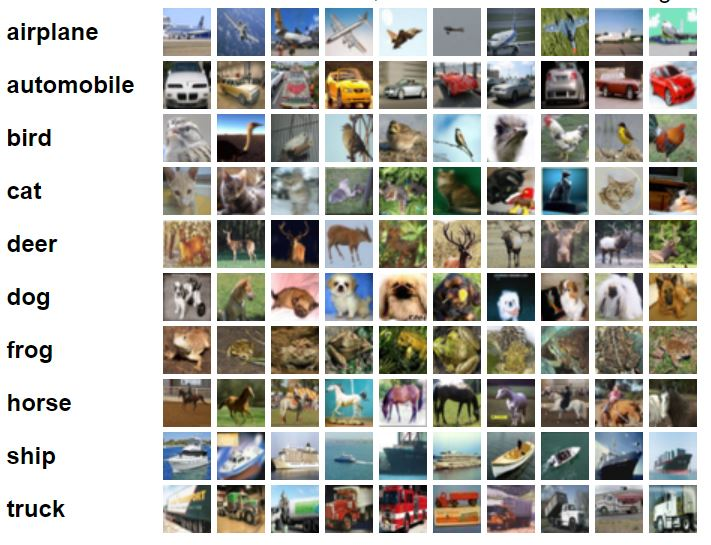**

In [ ]:
#Load libraries
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

### *TRAINING THE DATASET*


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
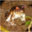

In [ ]:
X_train[0]

In [ ]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

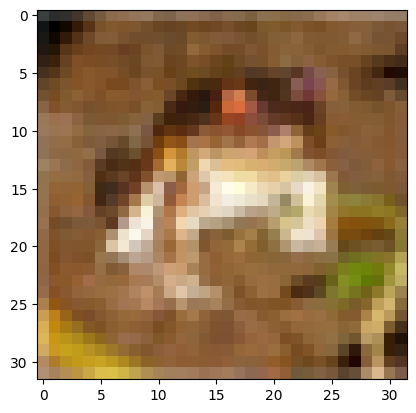

In [ ]:
plt.imshow(X_train[0])

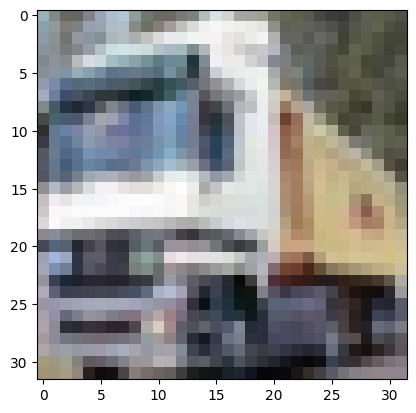

In [ ]:
plt.imshow(X_train[1])

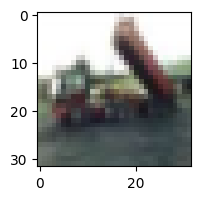

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[2])

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
classes[1]

'automobile'

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

# ***Preprocessing: Scale images***

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

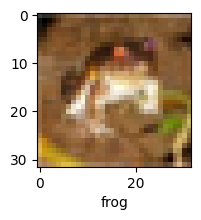

In [ ]:
plot_sample(X_train, y_train, 0)

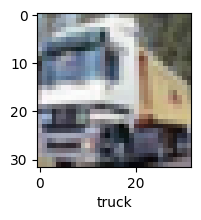

In [ ]:
plot_sample(X_train, y_train, 1)

### ***Normalizing the training data***

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# **Build simple artificial neural network for image classification**

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 175s 111ms/step - loss: 1.8092 - accuracy: 0.3550
Epoch 2/5
1563/1563 [==============================] - 171s 109ms/step - loss: 1.6213 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 166s 106ms/step - loss: 1.5432 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 167s 107ms/step - loss: 1.4801 - accuracy: 0.4791
Epoch 5/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.4322 - accuracy: 0.4958


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 31ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.65      0.57      1000
           1       0.52      0.72      0.60      1000
           2       0.36      0.38      0.37      1000
           3       0.36      0.26      0.30      1000
           4       0.53      0.27      0.36      1000
           5       0.39      0.40      0.39      1000
           6       0.53      0.55      0.54      1000
           7       0.48      0.64      0.55      1000
           8       0.71      0.46      0.56      1000
           9       0.53      0.53      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## ***Now is a good time to see few images of our dataset. We can visualize it in a subplot grid form. Since the image size is just 32×32 so don’t expect much from the image. It would be a blurred one. We can do the visualization using the subplot() function from matplotlib and looping over the first 25 images from our training dataset portion.***




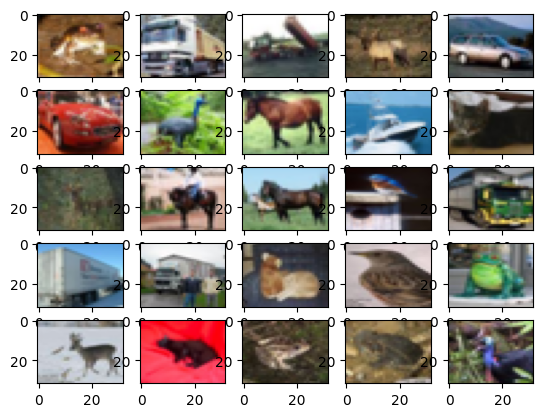

In [ ]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()


In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)



(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


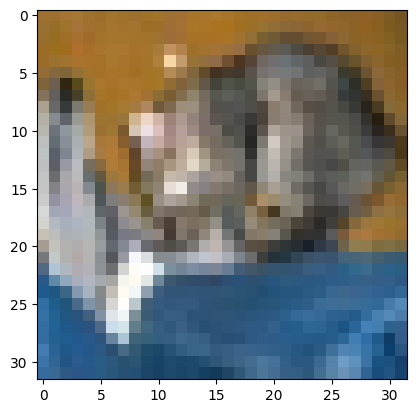

In [ ]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)


# **Convolutional neural network to train our images**

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.4395 - accuracy: 0.4852
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1023 - accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9731 - accuracy: 0.6600
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8944 - accuracy: 0.6873
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8343 - accuracy: 0.7088
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7887 - accuracy: 0.7242
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7425 - accuracy: 0.7410
Epoch 8/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7012 - accuracy: 0.7545
Epoch 9/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.6597 - accuracy: 0.7699
Epoch 10/10
1563/1563 [==============================] - 58s 37m

## ***With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features***

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 2.3197 - accuracy: 0.0995


[2.3196935653686523, 0.09950000047683716]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[0.09095495, 0.10518187, 0.14647895, 0.09493232, 0.121097  ,
        0.08807898, 0.09232835, 0.07955745, 0.09412156, 0.08726851],
       [0.10323637, 0.0940686 , 0.16853136, 0.08623894, 0.129008  ,
        0.07927699, 0.07631516, 0.08208842, 0.09919686, 0.08203921],
       [0.09373794, 0.09708802, 0.16940002, 0.09579738, 0.12720557,
        0.08668146, 0.07284609, 0.07431688, 0.09917901, 0.08374766],
       [0.09148007, 0.09988035, 0.17567436, 0.09062536, 0.12384178,
        0.08249938, 0.07655238, 0.07603023, 0.10261533, 0.08080077],
       [0.08867823, 0.10256942, 0.13316675, 0.10069674, 0.11709832,
        0.09380718, 0.09042341, 0.08264473, 0.09967438, 0.09124095]],
      dtype=float32)

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[2, 2, 2, 2, 2]

# **Accuracy error**

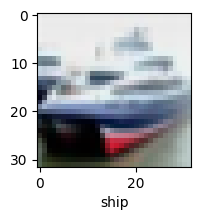

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
classes[y_classes[1]]

'bird'

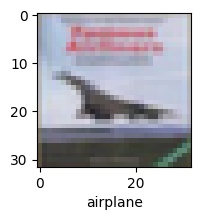

In [ ]:
plot_sample(X_test, y_test, 3)

In [ ]:
classes[y_classes[3]]

'bird'

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
print("Classification Report: \n",classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      0.98      0.18      1000
           3       0.00      0.00      0.00      1000
           4       0.10      0.01      0.02      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.02      0.10      0.02     10000
weighted avg       0.02      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
